In [2]:
from scipy import stats
import pandas as pd
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas_datareader as web

In [5]:
# start = datetime(2020, 1, 1)
# end = datetime(2021, 10, 21)

start = datetime(2019,3,1)
end = datetime(2020,3,31)

In [6]:
Visa = web.DataReader('V', 'yahoo', start, end)
spy_etf = web.DataReader('SPY', 'yahoo', start, end)

In [7]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-01,280.880005,278.820007,280.440002,280.420013,78880500.0,265.783936
2019-03-04,281.869995,276.839996,281.600006,279.399994,106494600.0,264.817139
2019-03-05,279.760010,278.410004,279.540009,279.019989,59114600.0,264.456970
2019-03-06,279.160004,276.970001,279.149994,277.329987,75039800.0,262.855164
2019-03-07,276.989990,274.070007,276.829987,275.010010,94885100.0,260.656250


In [8]:
Visa.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-01,149.929993,148.380005,149.460007,149.470001,7016800.0,146.724609
2019-03-04,150.190002,146.949997,150.070007,147.960007,6979700.0,145.242355
2019-03-05,149.289993,147.830002,148.000000,147.949997,9678600.0,145.232544
2019-03-06,148.520004,147.419998,148.000000,147.809998,8186400.0,145.095078
2019-03-07,147.809998,146.039993,147.259995,146.830002,8761700.0,144.133072


In [9]:
Visa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 274 entries, 2019-03-01 to 2020-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       274 non-null    float64
 1   Low        274 non-null    float64
 2   Open       274 non-null    float64
 3   Close      274 non-null    float64
 4   Volume     274 non-null    float64
 5   Adj Close  274 non-null    float64
dtypes: float64(6)
memory usage: 15.0 KB


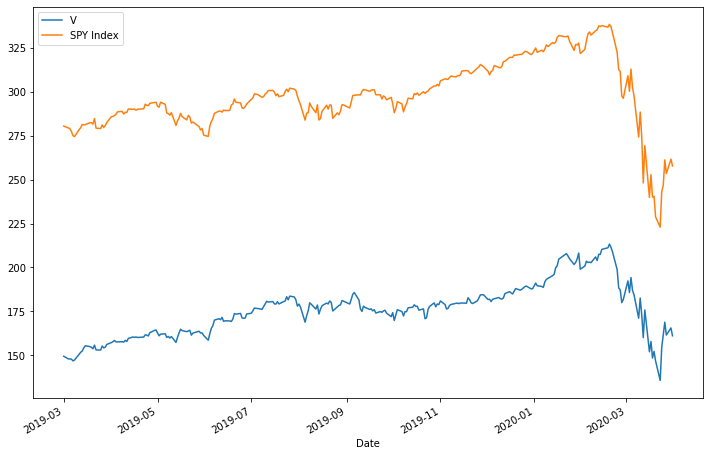

In [10]:
Visa['Close'].plot(label = 'V', figsize = (12, 8))
spy_etf['Close'].plot(label = 'SPY Index')
plt.legend()

# COMPARING THE  CUMULATIVE RETURN

In [11]:
Visa['Cumulative'] = Visa['Close'] / Visa['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close'] / spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'Cumulative Return')

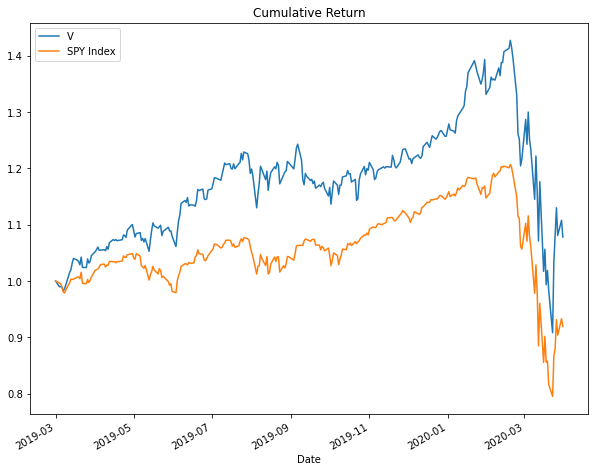

In [12]:
Visa['Cumulative'].plot(label = 'V', figsize = (10,8))
spy_etf['Cumulative'].plot(label = 'SPY Index')
plt.legend()
plt.title('Cumulative Return')

# Get Daily Return

In [13]:
Visa['Daily Return'] = Visa['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

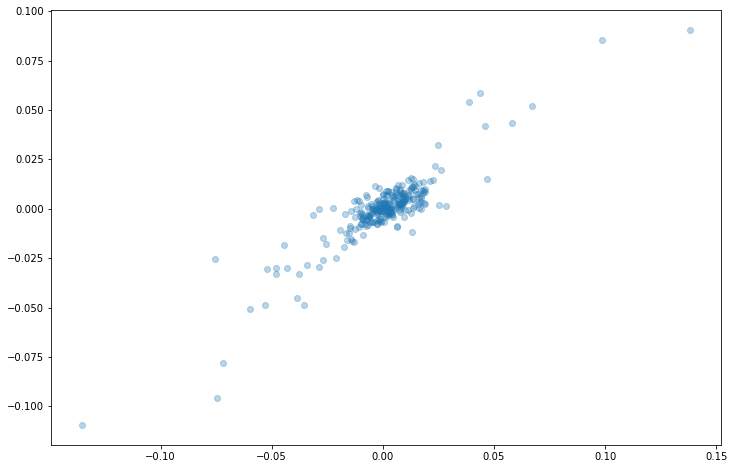

In [14]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(Visa['Daily Return'], spy_etf['Daily Return'], alpha = 0.3)

<AxesSubplot:>

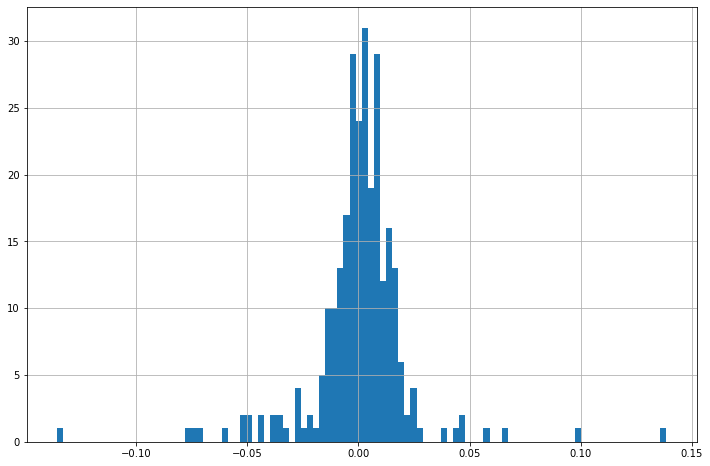

In [15]:
Visa['Daily Return'].hist(bins = 100, figsize = (12, 8))

<AxesSubplot:>

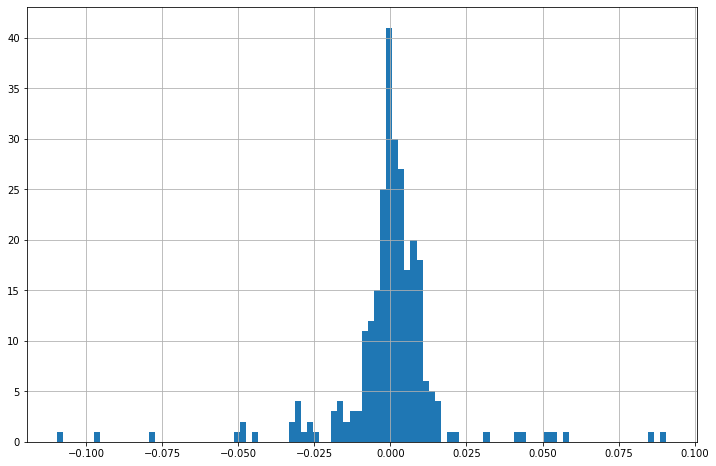

In [16]:
spy_etf['Daily Return'].hist(bins = 100, figsize = (12, 8))

In [17]:
beta,alpha, r_value, p_value, std_err = stats.linregress(Visa['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [18]:
beta

0.7352202325165954

In [19]:
alpha

-0.0005283942570376027

In [20]:
r_value

0.9061247685397932

In [21]:
p_value

2.942311024830233e-103

In [22]:
std_err

0.020849515887299656